In [133]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [134]:
from utils import loader
from utils import debugger 
from utils import preprocessing as pp 
import implementations as impl
import cost

## Load the training data into feature matrix, class labels, and event ids:

In [135]:
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, x, ids = loader.load_csv_data(DATA_TRAIN_PATH)
N = len(y)

### Preprocessing

In [136]:
error_value = -999.0

# Cleaned input array by replacing errors with most frequent values
x_clean_mf = pp.clean_data(x, error_value, pp.most_frequent)

# Cleaned input array by replacing errors with mean
x_clean_mean = pp.clean_data(x, error_value, np.mean)

# Cleaned input array by replacing errors with median
x_clean_median = pp.clean_data(x, error_value, np.median)

In [137]:
# Chosen cleaned data
x_clean = x_clean_mf

In [138]:
# Compute new_tX : column of ones followed by tX
first_col = np.ones((N, 1))
tx = np.concatenate((first_col, x_clean), axis=1)
tx.shape

(250000, 31)

In [139]:
w_across_impl = {}

In [140]:
# Test for Gradient Descent Least squares.

# Define the parameters of the algorithm.
max_iters = 200
gamma = 1e-6

# Initialization
w_initial = np.ones((31,))

# Debugger
dbg = debugger.Debugger(['loss', 'w'])

# Start gradient descent.
w, loss = impl.least_squares_GD(y, tx, w_initial, max_iters, gamma, debugger=dbg)

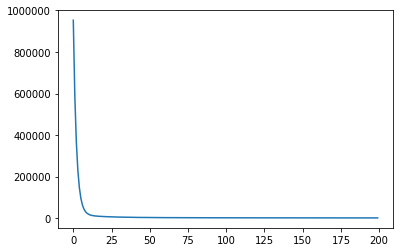

step 200/200:	loss: 922.4014724334551


In [141]:
dbg.plot('loss')
dbg.print('loss', last_n=1)
w_across_impl['GD_LS'] = w

In [142]:
# Test for Stochastic Gradient Descent Least squares.

# clear debugger
dbg.clear()

# Define the parameters of the algorithm.
max_iters = 200
gamma = 1e-6 # loss = 90047

# Initialization
w_initial = np.ones((31,))

# Start gradient descent.
w, loss = impl.least_squares_SGD(y, tx, w_initial, max_iters, gamma, debugger=dbg)

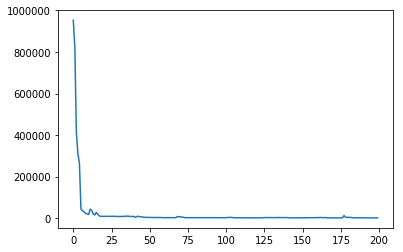

step 200/200:	loss: 1097.0667887588315


In [143]:
dbg.plot('loss')
dbg.print('loss', last_n=1)
w_across_impl['SGD_LS'] = w

In [144]:
# Test for Least squares with normal equations.

w, loss = impl.least_squares(y, tx)

In [145]:
w_across_impl['NE_LS'] = w

In [146]:
eps = 10
norm_w = np.linalg.norm(w)
n_impl = len(w_across_impl)

for i, impl1 in enumerate(w_across_impl):
    for j, impl2 in enumerate(w_across_impl):
        if(impl1 < impl2):
            error = np.linalg.norm(w_across_impl[impl1] - w_across_impl[impl2])
            print('Error between', impl1, 'and', impl2, 'is', error)
            assert error < eps
                
print('\nNorm of w:', norm_w)

Error between GD_LS and SGD_LS is 0.20196098598326528
Error between GD_LS and NE_LS is 6.255411437975912
Error between NE_LS and SGD_LS is 6.249207003294512

Norm of w: 5.346268418579422


In [147]:
for impl_1 in w_across_impl:
    for impl_2 in w_across_impl:
        assert np.linalg.norm(w_across_impl[impl_1] - w_across_impl[impl_2]) < eps

## Logistic regression test

In [140]:
w = np.random.rand(tx.shape[1])


In [142]:
gr = cost.compute_gradient_logreg(y, tx, w)
gr

/Users/aleman/code/epfl/ml-project-1/src/cost.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


array([-6.04840000e-01,  9.19024403e+01, -3.87470374e+01, -4.90499843e+01,
       -3.85259479e+01,  2.83326145e+02,  2.01077679e+02,  2.83890792e+02,
       -1.31996875e+00, -1.45168676e+01, -1.14290950e+02, -1.04208089e+00,
        1.85932264e-01,  2.83820289e+02, -2.03202841e+01,  2.86424800e-03,
       -5.36342000e-03, -3.05749068e+01,  8.63210800e-03, -1.92793480e-02,
       -2.91050171e+01,  1.46560680e-02, -1.46173730e+02, -8.53208000e-01,
        1.58583396e+02,  1.95526710e+02,  1.95528290e+02,  2.65229637e+02,
        2.83936289e+02,  2.83928991e+02, -6.33957593e+01])

In [144]:
loss = cost.compute_loss_ce(y, tx, w)
loss

/Users/aleman/code/epfl/ml-project-1/src/cost.py:30: RuntimeWarning: divide by zero encountered in log
  loss = -(1/N) * (np.sum(np.log(y_[pos_mask])) + np.sum(np.log(1 - y_[~pos_mask])))


inf

In [91]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.0000001 

# Initialization
w_initial = np.ones((30,))

In [67]:
debugger = debugger.Debugger(['loss', 'w'])

In [72]:
impl.logistic_regression(y, tX, w_initial, max_iters, gamma, debugger=debugger)

num_batch set to 1 as batch_size is None


/Users/aleman/code/epfl/ml-project-1/src/cost.py:12: RuntimeWarning: overflow encountered in exp
  
/Users/aleman/code/epfl/ml-project-1/src/cost.py:32: RuntimeWarning: divide by zero encountered in log
  


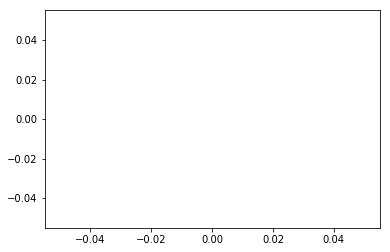

In [73]:
debugger.plot('loss')